## 2. 使用SVD/NMF进行图像压缩

### 2.1 SVD压缩图像

#### 2.1.1 将图片读入并转为64*64大小

In [1]:
import os
from PIL import Image

# 定义文件夹路径
dataset_path = "./dataset/images64"

# 获取文件夹中所有的 JPG 文件
file_list = [file for file in os.listdir(dataset_path) if file.endswith(".jpg")]

# 遍历文件列表
for file_name in file_list:
    # 构建完整的文件路径
    file_path = os.path.join(dataset_path, file_name)
    
    # 使用PIL库打开图像文件
    image = Image.open(file_path)
    
    # 调整图像大小为64x64
    resized_image = image.resize((64, 64))
    
    # 覆盖原图像文件
    resized_image.save(file_path)

#### 2.1.2 按要求读入图片到矩阵中

In [1]:
import os
from PIL import Image
import numpy as np
from natsort import natsorted

# 数据集文件夹
dataset_path = "./dataset/images64"

# 获取数据集里的所有图片
file_list = [file for file in os.listdir(dataset_path) if file.endswith(".jpg")]

# 根据字典序排序以便显示
file_list = natsorted(file_list)
print("图片数目: ", len(file_list))
print("文件列表: ", file_list)

# 定义矩阵和图片大小
width, height = 64, 64
Mr, Mg, Mb = [], [], []
rgb_list = []

# 遍历所有图片
for file_name in file_list:
    # 获取当前图片的路径
    file_path = os.path.join(dataset_path, file_name)

    # 打开图片
    image = Image.open(file_path)

    # 将图片转化为三通道
    image_rgb = image.convert("RGB")
    r_channel, g_channel, b_channel = image_rgb.split()

    # 将其转化为numpy数组
    r_array = np.array(r_channel).flatten()
    g_array = np.array(g_channel).flatten()
    b_array = np.array(b_channel).flatten()

    # 存储到不同的通道矩阵
    Mr.append(r_array)
    Mg.append(g_array)
    Mb.append(b_array)

    # 将当前图片的rgb三列合并，同时加入到rgb_list中
    rgb = np.dstack((r_array, g_array, b_array)).reshape(width * height, 3)
    rgb_list.append(rgb)

# 将所有图片的rgb三列合并成一个大矩阵M
M = np.concatenate(rgb_list, axis=1)
print("M的形状:",M.shape)

# 获取矩阵的维度信息
height, width = 64, 64
channels = 3
num_images = len(file_list)

# 进行 SVD 分解
U, S, V = np.linalg.svd(M, full_matrices=False)

# 设置截断参数 d
d = 16

# 取前 d 个奇异值和对应的左奇异向量和右奇异向量
U_truncated = U[:, :d]
S_truncated = S[:d]
V_truncated = V[:d, :]

图片数目:  400
文件列表:  ['0_2000.jpg', '1_2000.jpg', '2_2000.jpg', '3_2000.jpg', '4_2000.jpg', '5_2000.jpg', '6_2000.jpg', '7_2000.jpg', '8_2000.jpg', '9_2000.jpg', '10_2000.jpg', '11_2000.jpg', '12_2000.jpg', '13_2000.jpg', '14_2000.jpg', '15_2000.jpg', '16_2000.jpg', '17_2000.jpg', '18_2000.jpg', '19_2000.jpg', '20_2000.jpg', '21_2000.jpg', '22_2000.jpg', '23_2000.jpg', '24_2000.jpg', '25_2000.jpg', '26_2000.jpg', '27_2000.jpg', '28_2000.jpg', '29_2000.jpg', '30_2000.jpg', '31_2000.jpg', '32_2000.jpg', '33_2000.jpg', '34_2000.jpg', '35_2000.jpg', '36_2000.jpg', '37_2000.jpg', '38_2000.jpg', '39_2000.jpg', '40_2000.jpg', '41_2000.jpg', '42_2000.jpg', '43_2000.jpg', '44_2000.jpg', '45_2000.jpg', '46_2000.jpg', '47_2000.jpg', '48_2000.jpg', '49_2000.jpg', '50_2000.jpg', '51_2000.jpg', '52_2000.jpg', '53_2000.jpg', '54_2000.jpg', '55_2000.jpg', '56_2000.jpg', '57_2000.jpg', '58_2000.jpg', '59_2000.jpg', '60_2000.jpg', '61_2000.jpg', '62_2000.jpg', '63_2000.jpg', '64_2000.jpg', '65_2000.jpg', '

#### 2.1.3 输出前16大的奇异值

In [3]:
print(f"前{d}大奇异值:\n\n",S_truncated)

前16大奇异值:

 [334604.30490469  46903.82853861  38098.3315287   32994.81432138
  30725.25172779  22089.03975402  21923.49724318  19053.85940509
  18681.96684303  16520.7690902   16250.28422541  15046.96791233
  14927.53711502  14675.27903988  14376.17719267  13615.86468131]


#### 2.1.4 将U矩阵还原为灰度图

SVD-d0.jpg


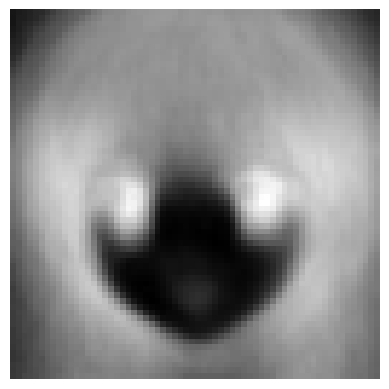

SVD-d1.jpg


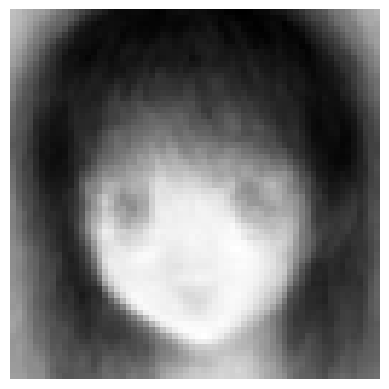

SVD-d2.jpg


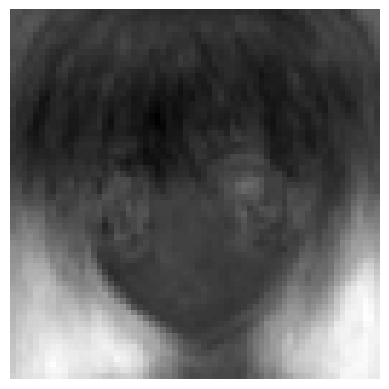

SVD-d3.jpg


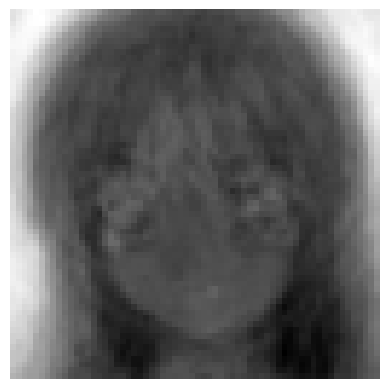

SVD-d4.jpg


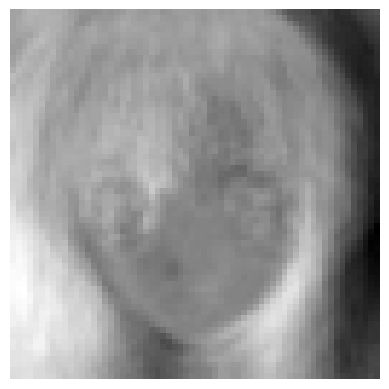

SVD-d5.jpg


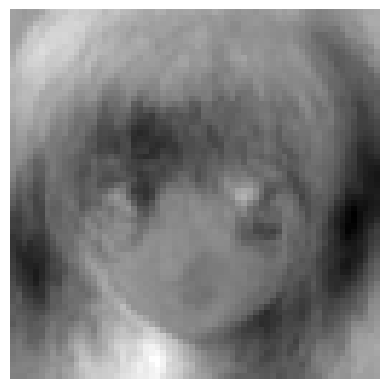

SVD-d6.jpg


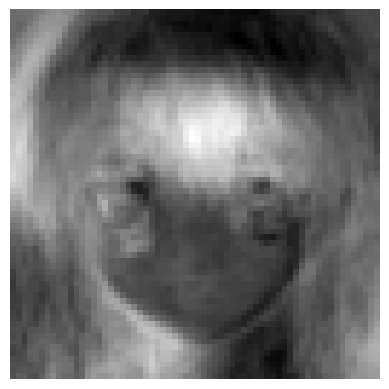

SVD-d7.jpg


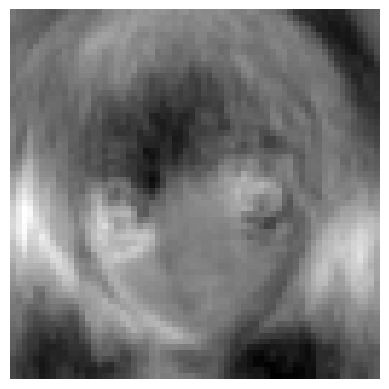

SVD-d8.jpg


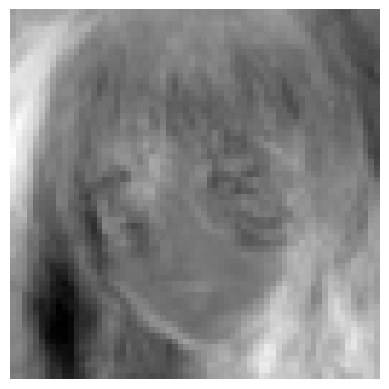

SVD-d9.jpg


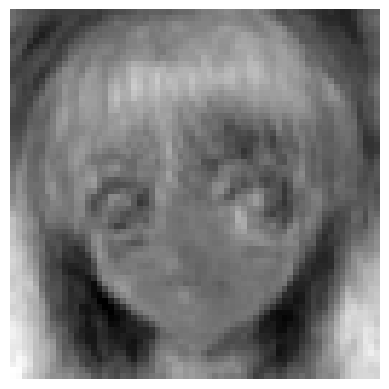

SVD-d10.jpg


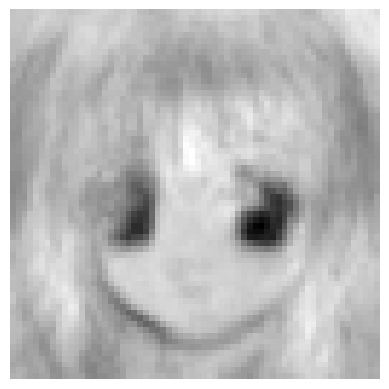

SVD-d11.jpg


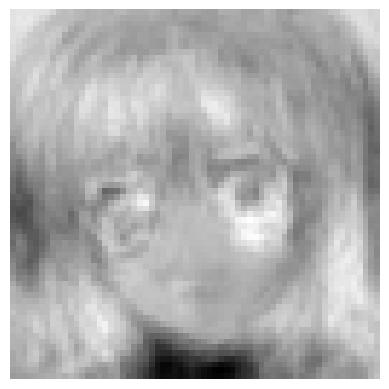

SVD-d12.jpg


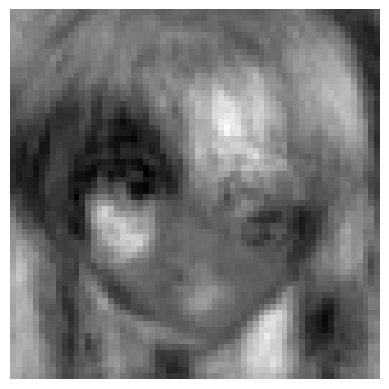

SVD-d13.jpg


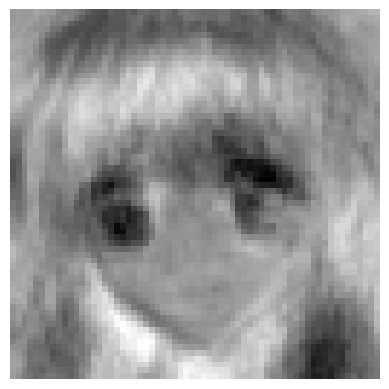

SVD-d14.jpg


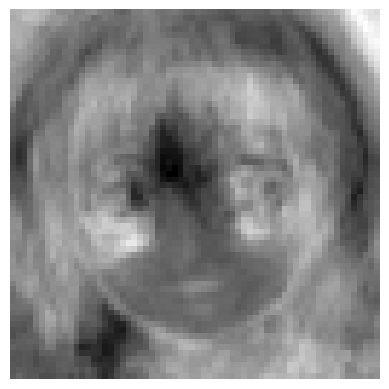

SVD-d15.jpg


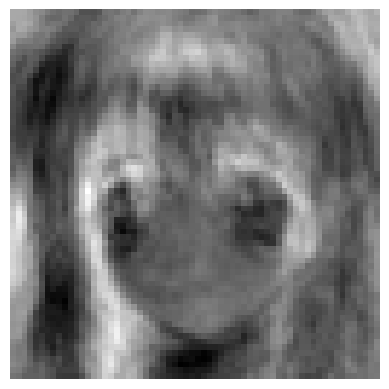

In [4]:
import matplotlib.pyplot as plt

# 创建保存图片的文件夹
output_folder = './result/q2/U16_SVD_Images/'
os.makedirs(output_folder, exist_ok=True)

for i in range(16):
    # 将U矩阵归一化到[0, 255]范围
    U_i = U_truncated[:,i]
    normalized_U = (U_i - np.min(U_i)) * (255 / (np.max(U_i) - np.min(U_i)))

    # 将U_i矩阵reshape为64x64的图像形状
    file_name = f"SVD-d{i}.jpg"
    print(file_name)
    image = np.reshape(normalized_U, (64, 64))

    # 创建保存图片的文件路径并保存灰度图
    output_path = os.path.join(output_folder, file_name)
    plt.imsave(output_path, image, cmap='gray')

    # 显示灰度图
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

### 2.1.5 使用SVD恢复前20张RGB图像 

图0_2000.jpg原图:


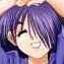

图0_2000.jpg-SVD恢复图:


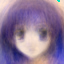

图1_2000.jpg原图:


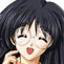

图1_2000.jpg-SVD恢复图:


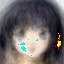

图2_2000.jpg原图:


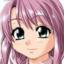

图2_2000.jpg-SVD恢复图:


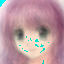

图3_2000.jpg原图:


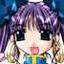

图3_2000.jpg-SVD恢复图:


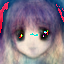

图4_2000.jpg原图:


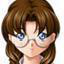

图4_2000.jpg-SVD恢复图:


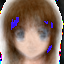

图5_2000.jpg原图:


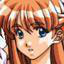

图5_2000.jpg-SVD恢复图:


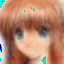

图6_2000.jpg原图:


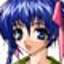

图6_2000.jpg-SVD恢复图:


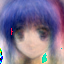

图7_2000.jpg原图:


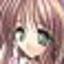

图7_2000.jpg-SVD恢复图:


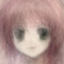

图8_2000.jpg原图:


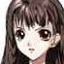

图8_2000.jpg-SVD恢复图:


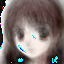

图9_2000.jpg原图:


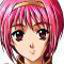

图9_2000.jpg-SVD恢复图:


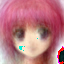

图10_2000.jpg原图:


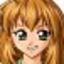

图10_2000.jpg-SVD恢复图:


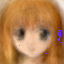

图11_2000.jpg原图:


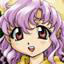

图11_2000.jpg-SVD恢复图:


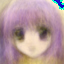

图12_2000.jpg原图:


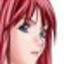

图12_2000.jpg-SVD恢复图:


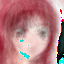

图13_2000.jpg原图:


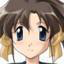

图13_2000.jpg-SVD恢复图:


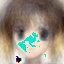

图14_2000.jpg原图:


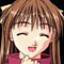

图14_2000.jpg-SVD恢复图:


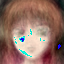

图15_2000.jpg原图:


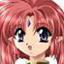

图15_2000.jpg-SVD恢复图:


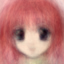

图16_2000.jpg原图:


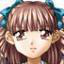

图16_2000.jpg-SVD恢复图:


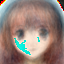

图17_2000.jpg原图:


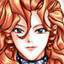

图17_2000.jpg-SVD恢复图:


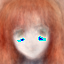

图18_2000.jpg原图:


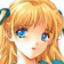

图18_2000.jpg-SVD恢复图:


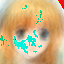

图19_2000.jpg原图:


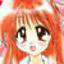

图19_2000.jpg-SVD恢复图:


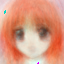

In [4]:
# 指定图片信息
height, width, channels, num_images = 64, 64, 3, 400
# 创建保存图片的文件夹
output_folder = './result/q2/20_RGB_SVD_Images/'
os.makedirs(output_folder, exist_ok=True)

# 初始化存储重构图片的数组
reconstructed_images = np.zeros((height, width, channels, num_images), dtype=np.uint8)
all_image_data = U_truncated * S_truncated @ V_truncated

# 对每三列数据进行rgb通道的还原
for i in range(0, channels * num_images, channels):
    # 获取V的第 i 列到 i+2 列的数据并得到USV，即单张图片的RGB通道
    image_data = all_image_data[:,i:i+channels]
    image_data = image_data.flatten()

    # 将数据重新构造为RGB图像(64,64,3)
    new_img_data = image_data.reshape(height, width, channels)

    # 存储还原后的图像，前三维是图像的RGB通道，最后一维是图片的序号
    reconstructed_images[:, :, :, i // channels] = new_img_data

# 显示前20张的原始图片和SVD还原后的图片，保存SVD还原后的图片
for i in range(20):
    original_image = Image.fromarray(M[:, i*channels:(i+1)*channels].reshape(height, width, channels), 'RGB')
    reconstructed_image = Image.fromarray(reconstructed_images[:, :, :, i], 'RGB')
    print(f"图{file_list[i]}原图:")
    original_image.show()
    print(f"图{file_list[i]}-SVD恢复图:")
    file_name = f"图{file_list[i]}-SVD恢复图.jpg"  # 保存路径和文件名
    
    # 保存图像
    output_path = os.path.join(output_folder, file_name)
    reconstructed_image.save(output_path)
    reconstructed_image.show()

### 2.2 NMF

#### 2.2.1 定义NMF函数

In [2]:
import numpy as np

def nmf(X, n_components, max_iter=10000, tol=1e3, threshold=1):
    # 根据作业的要求，将W和H随机初始化为[0,255]之间的数
    W = np.random.rand(X.shape[0], n_components) * 255  
    H = np.random.rand(n_components, X.shape[1]) * 255
    pre_error = 0

    for i in range(max_iter):
        # 更新矩阵 H
        H *= np.dot(W.T, X) / np.dot(np.dot(W.T, W), H)

        # 更新矩阵 W
        W *= np.dot(X, H.T) / np.dot(np.dot(W, H), H.T)

        # 计算误差
        error = np.linalg.norm(X - np.dot(W, H), 'fro') ** 2
        # print(f"{i}:",error)

        # 检查停止条件
        if error < tol or abs(error - pre_error) < threshold:
            break

        pre_error = error

    return W, H

#### 2.2.2 对图像矩阵进行分解与还原

In [3]:
import numpy as np

n_components = 16

W, H = nmf(M, n_components, max_iter=10000, tol=1e3, threshold=1)

# 还原矩阵 M 的 RGB 通道并与原图对比
M_reconstructed = np.dot(W, H).reshape(M.shape)
print(M_reconstructed.shape)

(4096, 1200)


### 2.4.3 保存灰度图

NMF-d0.jpg


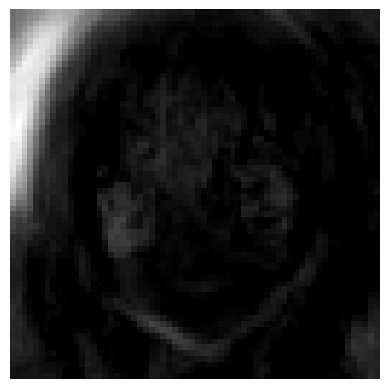

NMF-d1.jpg


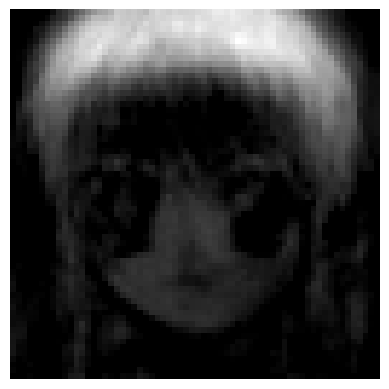

NMF-d2.jpg


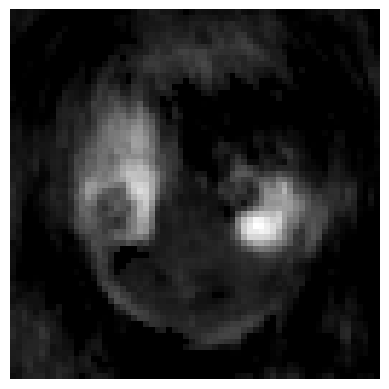

NMF-d3.jpg


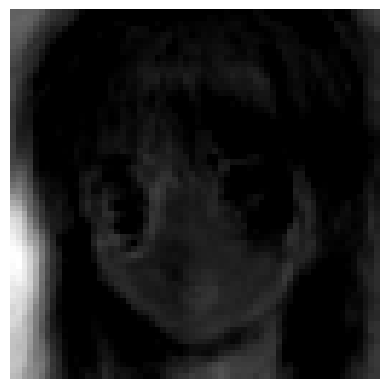

NMF-d4.jpg


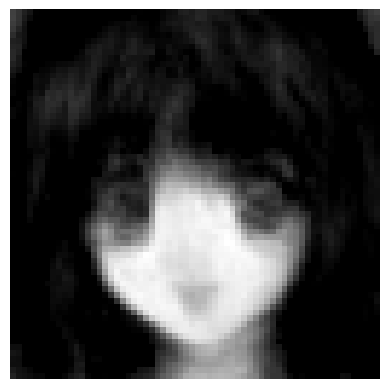

NMF-d5.jpg


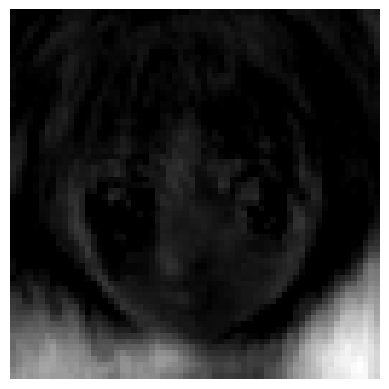

NMF-d6.jpg


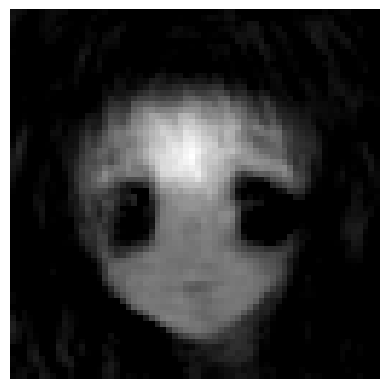

NMF-d7.jpg


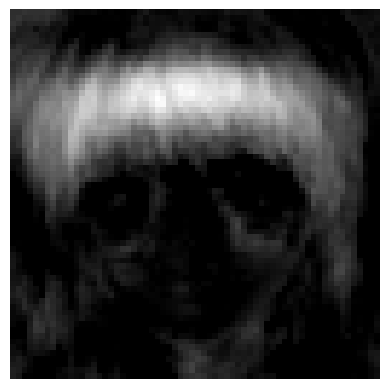

NMF-d8.jpg


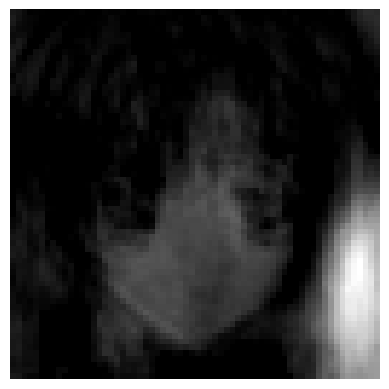

NMF-d9.jpg


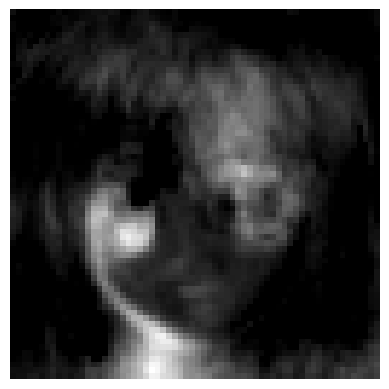

NMF-d10.jpg


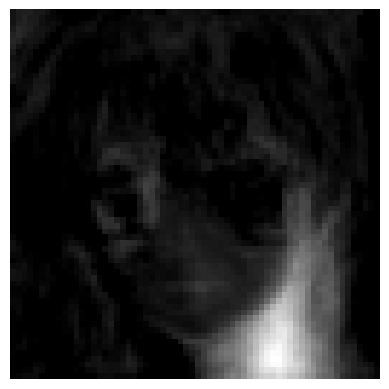

NMF-d11.jpg


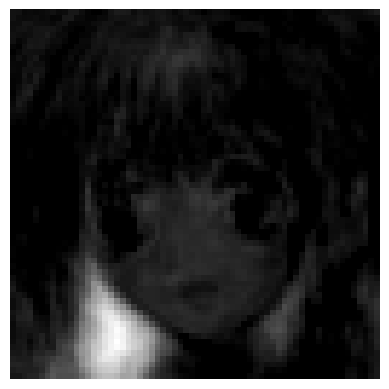

NMF-d12.jpg


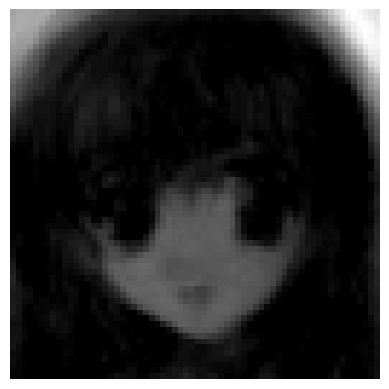

NMF-d13.jpg


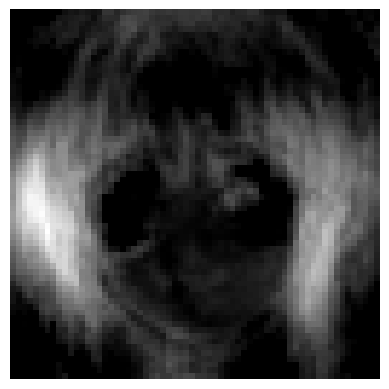

NMF-d14.jpg


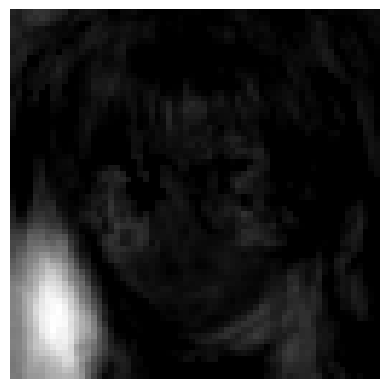

NMF-d15.jpg


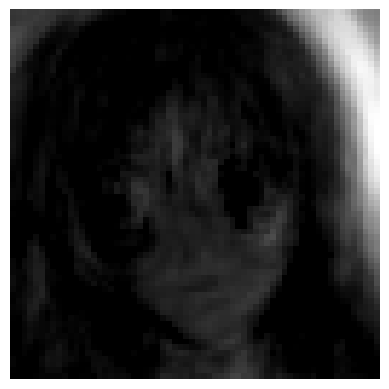

In [4]:
import matplotlib.pyplot as plt

# 创建保存图片的文件夹
output_folder = './result/q2/M16_NMF_Images/'
os.makedirs(output_folder, exist_ok=True)

for i in range(16):
    grey_arr = W[:, i]
    # minmax标准化到[0,255]之间
    normalized_grey_arr = (grey_arr - np.min(grey_arr)) * (255 / (np.max(grey_arr) - np.min(grey_arr)))

    # 将U矩阵reshape为64x64的图像形状
    file_name = f"NMF-d{i}.jpg"
    print(file_name)
    image = np.reshape(normalized_grey_arr, (64, 64))

    # 创建保存图片的文件路径
    output_path = os.path.join(output_folder, file_name)
    plt.imsave(output_path, image, cmap='gray')

    # 显示图像
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

#### 2.4.4 对比前20张原图和恢复后的图，并保存恢复后的图

图0_2000.jpg原图:


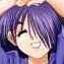

图0_2000.jpg-NMF恢复图:


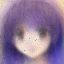

图1_2000.jpg原图:


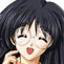

图1_2000.jpg-NMF恢复图:


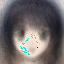

图2_2000.jpg原图:


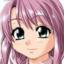

图2_2000.jpg-NMF恢复图:


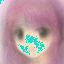

图3_2000.jpg原图:


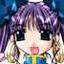

图3_2000.jpg-NMF恢复图:


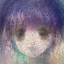

图4_2000.jpg原图:


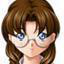

图4_2000.jpg-NMF恢复图:


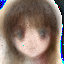

图5_2000.jpg原图:


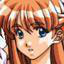

图5_2000.jpg-NMF恢复图:


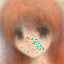

图6_2000.jpg原图:


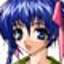

图6_2000.jpg-NMF恢复图:


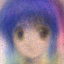

图7_2000.jpg原图:


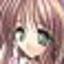

图7_2000.jpg-NMF恢复图:


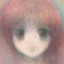

图8_2000.jpg原图:


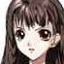

图8_2000.jpg-NMF恢复图:


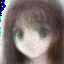

图9_2000.jpg原图:


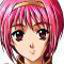

图9_2000.jpg-NMF恢复图:


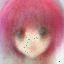

图10_2000.jpg原图:


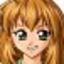

图10_2000.jpg-NMF恢复图:


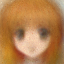

图11_2000.jpg原图:


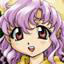

图11_2000.jpg-NMF恢复图:


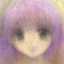

图12_2000.jpg原图:


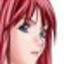

图12_2000.jpg-NMF恢复图:


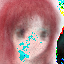

图13_2000.jpg原图:


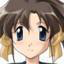

图13_2000.jpg-NMF恢复图:


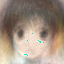

图14_2000.jpg原图:


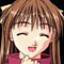

图14_2000.jpg-NMF恢复图:


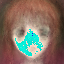

图15_2000.jpg原图:


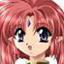

图15_2000.jpg-NMF恢复图:


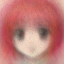

图16_2000.jpg原图:


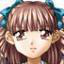

图16_2000.jpg-NMF恢复图:


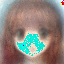

图17_2000.jpg原图:


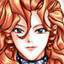

图17_2000.jpg-NMF恢复图:


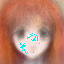

图18_2000.jpg原图:


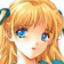

图18_2000.jpg-NMF恢复图:


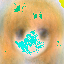

图19_2000.jpg原图:


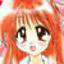

图19_2000.jpg-NMF恢复图:


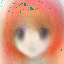

In [15]:
# 创建保存图片的文件夹
output_folder = './result/q2/20_RGB_NMF_Images/'
os.makedirs(output_folder, exist_ok=True)

for i in range(20):
    # 读入原图
    original_image = Image.fromarray(np.uint8(M[:, i*3:(i+1)*3].reshape(64,64,-1)))
    # 读入恢复的图片
    reconstructed_image = Image.fromarray(np.uint8(M_reconstructed[:, i*3:(i+1)*3].reshape(64,64,-1)))
    # 展示原图与恢复图
    print(f"图{file_list[i]}原图:")
    original_image.show()
    print(f"图{file_list[i]}-NMF恢复图:")
    file_name = f"图{file_list[i]}-NMF恢复图.jpg"  # 保存路径和文件名
    # 保存恢复图
    output_path = os.path.join(output_folder, file_name)
    reconstructed_image.save(output_path)
    reconstructed_image.show()